# Домашнее задание: Иерархическая кластеризация и DBSCAN

## 1. Загрузка данных и предварительная обработка

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

# Загрузка данных
df = pd.read_csv("penguins.csv")

# Обработка пропущенных значений
imputer = SimpleImputer(strategy="median")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Кодирование категориального признака 'sex'
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Вывод первых строк обработанных данных
df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,False,True
1,39.50,17.4,186.0,3800.0,True,False
2,40.30,18.0,195.0,3250.0,True,False
3,44.45,17.3,197.0,4050.0,False,False
4,36.70,19.3,193.0,3450.0,True,False


## 2. Иерархическая кластеризация (AgglomerativeClustering)

In [2]:

# Подбор гиперпараметров для AgglomerativeClustering
n_clusters_list = [2, 3, 4, 5]
linkage_options = ["ward", "complete", "average", "single"]
best_ari = -1
best_model = None

for n_clusters in n_clusters_list:
    for link in linkage_options:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
        labels = clustering.fit_predict(scaled_data)
        ari = adjusted_rand_score(df.index, labels)  # Используем индекс строк как "истинные метки"
        print(f"n_clusters={n_clusters}, linkage={link}, ARI={ari:.4f}")
        
        if ari > best_ari:
            best_ari = ari
            best_model = clustering

# Сохранение лучшей модели
joblib.dump(best_model, "agglomerative_model.joblib")


n_clusters=2, linkage=ward, ARI=0.0000
n_clusters=2, linkage=complete, ARI=0.0000
n_clusters=2, linkage=average, ARI=0.0000
n_clusters=2, linkage=single, ARI=0.0000
n_clusters=3, linkage=ward, ARI=0.0000
n_clusters=3, linkage=complete, ARI=0.0000
n_clusters=3, linkage=average, ARI=0.0000
n_clusters=3, linkage=single, ARI=0.0000
n_clusters=4, linkage=ward, ARI=0.0000
n_clusters=4, linkage=complete, ARI=0.0000
n_clusters=4, linkage=average, ARI=0.0000
n_clusters=4, linkage=single, ARI=0.0000
n_clusters=5, linkage=ward, ARI=0.0000
n_clusters=5, linkage=complete, ARI=0.0000
n_clusters=5, linkage=average, ARI=0.0000
n_clusters=5, linkage=single, ARI=0.0000


['agglomerative_model.joblib']

## 3. Построение дендрограммы

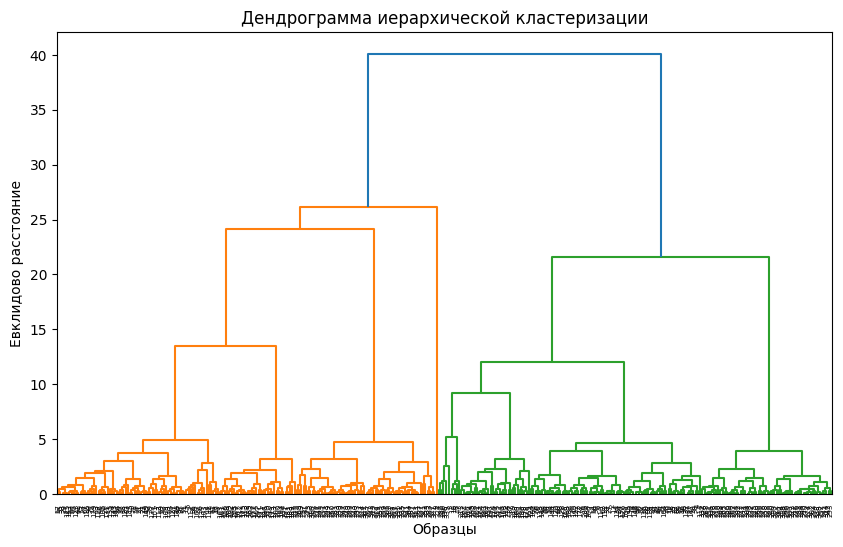

In [3]:

# Построение дендрограммы
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Дендрограмма иерархической кластеризации")
plt.xlabel("Образцы")
plt.ylabel("Евклидово расстояние")
plt.show()


## 4. Применение DBSCAN

In [4]:

# Подбор параметров DBSCAN
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7]
best_silhouette = -1
best_dbscan = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        # Проверяем, есть ли хотя бы 2 кластера (исключаем -1 для выбросов)
        if len(set(labels)) > 1:
            silhouette = silhouette_score(scaled_data, labels)
            print(f"eps={eps}, min_samples={min_samples}, silhouette={silhouette:.4f}")

            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_dbscan = dbscan

# Сохранение лучшей модели DBSCAN
joblib.dump(best_dbscan, "dbscan_model.joblib")


eps=0.3, min_samples=3, silhouette=-0.0720
eps=0.3, min_samples=5, silhouette=-0.1550
eps=0.3, min_samples=7, silhouette=-0.2650
eps=0.5, min_samples=3, silhouette=0.4308
eps=0.5, min_samples=5, silhouette=0.4337
eps=0.5, min_samples=7, silhouette=0.4183
eps=0.7, min_samples=3, silhouette=0.5410
eps=0.7, min_samples=5, silhouette=0.5384
eps=0.7, min_samples=7, silhouette=0.5283
eps=1.0, min_samples=3, silhouette=0.3430
eps=1.0, min_samples=5, silhouette=0.4444
eps=1.0, min_samples=7, silhouette=0.4444


['dbscan_model.joblib']

## 5. Визуализация кластеров DBSCAN

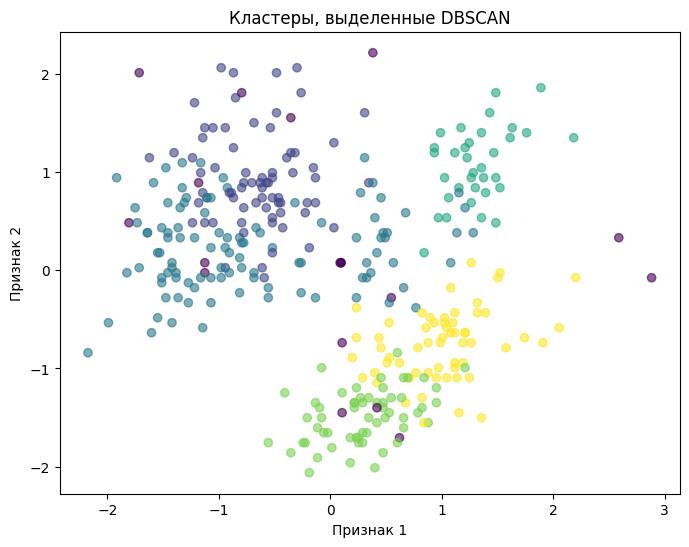

In [5]:

# Визуализация кластеров DBSCAN
labels = best_dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Кластеры, выделенные DBSCAN")
plt.show()
